# <center>Actividad 4 - Interpretabilidad de algoritmos</center>

En esta actividad se pide realizar un análisis exploratorio de datos sobre un tema escogido, para luego a través de diferentes algoritmos predecir las hipótesis planteadas. Para a continuación llevar a cabo la interpretación de los algoritmos utilizados, para mostrar cuáles son los mejores y así extraer información comprensible para el ser humano.

## <center><u>EXOPLANETAS</u></center>

Estudiantes: Rubén Martínez Gormaz | Samuel Fernando Méndez | Ruoyan Zhang | Lian Salmerón López <br> <b>Grupo 6</b>

## <center>Contexto</center>

Todos los planetas de nuestro sistema solar orbitan alrededor del Sol, los planetas que orbitan alrededor de otras estrellas se llaman exoplanetas.<br> 
Los exoplanetas son muy difíciles de ver directamente con telescopios, están ocultos por el resplandor brillante de las estrellas que alrededor de las que orbitan.<br> <p>
	En la actualidad, se ha confirmado la existencia de casi cuatro mil exoplanetas. <br>
	Algunos son masivos, como Júpiter, pero giran alrededor de su estrella progenitora mucho más cerca de lo que Mercurio orbita el Sol. <br>
    Otros son rocosos o helados, 
	y muchos simplemente no tienen nada parecido en el Sistema Solar.<p> 
	Hay sistemas que albergan más de un planeta, planetas que orbitan dos estrellas a la vez, 
	e incluso un puñado de planetas que podrían presentar las condiciones adecuadas para que su superficie tenga agua de forma estable, uno de los elementos necesarios para la vida tal y como la conocemos. <br>

## <center>Planteamiento</center>

En este analisis se estudiará el comportamiento de los exoplanetas a traves de los datos obtenidos del datasheet, los cuales haremos un tratamiento previo de ellos, aplicando los filtros necesarios para obtener unos datos más limpios con los que se 
procederá a sacar obtener algunas gráficas representativas a continuación se procederá a aplicar los modelos y finalmete se realiazá la predicción de los resultados obtenidos de los modelos, según el criterio obtenidos tras el estudio.


## <center>Materiales</center>

In [ ]:
## REALIZACIÓN WEB SCRAPPING

## <center>Instalaciones de liberías</center>

A continuación se van a mostrar las librerías que se han utilizado para este proyecto junto con una breve descripción de lo que ofrecen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import seaborn as sns
import sklearn
import astropy.units as u
import astropy.units.astrophys as ua
import sklearn.cluster as cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

## <center>Carga de datos</center>

In [2]:
# Cargamos el txt, señalando que el separador son ","
df_exoplanetas = pd.read_csv(r"exoplanetas.txt", sep=",")

In [6]:
# Mostramos la tabla
df_exoplanetas.head()

name  binaryflag    mass  radius     period  semimajoraxis  \
0   KOI-1843.03           0  0.0014   0.054   0.176891         0.0048   
1  Kepler-974 b           0     NaN   0.140   4.194497         0.0390   
2   KOI-1843.02           0     NaN   0.071   6.356006         0.0520   
3    Kepler-9 b           0  0.2500   0.840  19.224180         0.1430   
4    Kepler-9 c           0  0.1700   0.820  39.031060         0.2290   

   eccentricity  periastron  longitude  ascendingnode  ...  lastupdate  \
0           NaN         NaN        NaN            NaN  ...    13/07/15   
1           NaN         NaN        NaN            NaN  ...    17/11/28   
2           NaN         NaN        NaN            NaN  ...         NaN   
3        0.0626         NaN        NaN            NaN  ...    15/12/03   
4        0.0684         NaN        NaN            NaN  ...    15/12/03   

   system_rightascension  system_declination system_distance  hoststar_mass  \
0          19 00 03.1450      +40 13 14.7985         134.833           0.52   
1          19 00 03.1450      +40 13 14.7985         134.833           0.52   
2          19 00 03.1450      +40 13 14.7985         134.833           0.52   
3          19 02 17.7544      +38 24 03.1772         650.000           1.07   
4          19 02 17.7544      +38 24 03.1772         650.000           1.07   

  hoststar_radius hoststar_metallicity hoststar_temperature  hoststar_age  \
0            0.50                 0.07               3687.0           NaN   
1            0.50                 0.07               3687.0           NaN   
2            0.50                 0.07               3687.0           NaN   
3            1.02                 0.12               5777.0           NaN   
4            1.02                 0.12               5777.0           NaN   

                list  
0      Controversial  
1  Confirmed planets  
2      Controversial  
3  Confirmed planets  
4  Confirmed planets  

[5 rows x 25 columns]

In [7]:
df_exoplanetas.shape

(5140, 25)

El conjunto de datos cuenta con 5140 filas (planetas) y 25 columnas (características).

In [7]:
# Mostramos las columnas que componen el datasheet
df_exoplanetas.columns

Index(['name', 'binaryflag', 'mass', 'radius', 'period', 'semimajoraxis',
       'eccentricity', 'periastron', 'longitude', 'ascendingnode',
       'inclination', 'temperature', 'age', 'discoverymethod', 'discoveryyear',
       'lastupdate', 'system_rightascension', 'system_declination',
       'system_distance', 'hoststar_mass', 'hoststar_radius',
       'hoststar_metallicity', 'hoststar_temperature', 'hoststar_age', 'list'],
      dtype='object')

### <u>Datos</u>

<ul>
    <li>name: Identificador principal del planeta.</li>
    <li>binaryflag: Bandera binaria que guarda:
        <ul>
            <li>0 - No se conoce compañera binaria estelar.</li>
            <li>1 - Binario de tipo P (circumbinario) que orbita dos estrellas.</li>
            <li>2 - Binario de tipo S, (no circumbinario).</li>
            <li>3 - Planeta huérfano, no tiene estrella.</li>
        </ul>
    </li>
    <li>mass: Masa del planeta en comparación con la masa de Júpiter.</li>
    <li>radius: Radio físico del planeta en comparación con el radio de Júpiter.</li>
    <li>period: Número de días que necesita el planeta para rodear a la estrella anfitriona.</li>
    <li>semimajoraxis: Distancia a la estrella anfitriona.</li>
    <li>eccentricity: Excentricidad, es un número que mide como son las órbitas elípticas, cuanto mayor sea el valor, más estirada es la órbita: 
        <ul>
            <li>=0: la órbita es un círculo.</li>
            <li>>0: la órbita es una elipse.</li>
        </ul>
    </li>
    <li>periastron: periastron, punto en una órbita elíptica que se acerca más al centro de la estrella (grados).</li>
    <li>longitude: Longitud (grados).</li>
    <li>ascendingnode: Nodo ascendente, es el punto donde el objeto cruza el plano de referencia moviéndose desde el hemisferio sur al hemisferio norte celeste. (grados).</li>
    <li>inclination: Inclinación, ángulo que forma el plano de la órbita (plano orbital) del planeta con respecto a un plano de referencia (grados).</li>
    <li>temperature: Temperatura de la superficie del planeta asumiendo que el planeta no tiene atmósfera (Kelvin).</li>
    <li>age: Años del planeta en billones de años (Gyr - 10^9).</li>
    <li>discoverymethod: Método por el que fue descubierto.</li>
    <li>discoveryyear: Año en el que fue descubierto [yyyy].</li>
    <li>lastupdate: Última actualización del planeta [yy/mm/dd].</li>
    <li>system_rightascension: Es una coordenada celeste que toma el lugar de la longitud (hh/mm/ss).</li>
    <li>system_declination: La coordenada celeste que toma el lugar de la latitud (+/-dd/mm/ss).</li>
    <li>system_distance: Distancia de la estrella anfitriona al Sol (parsecs).</li>
    <li>hoststar_mass: Masa de la estrella anfitriona en comparación con la masa del Sol.</li>
    <li>hoststar_radius: Radio físico de la estrella anfitriona en comparación con el radio del Sol.</li>
    <li>hoststar_metallicity: Metalicidad estelar relativa al Sol (describe la abundancia relativa de elementos más pesados que el helio en una estrella) (logaritmo relativo a la energía solar).</li>
    <li>hoststar_temperature: Temperatura de la estrella (Kelvin).</li>
    <li>hoststar_age: Edad de la estrella anfitriona (Gyr).</li>
    <li>list: Una lista de listas en las que se encuentra el planeta.</li>
</ul>

In [8]:
# Se sacan la informacion que se guarda en la columna lista
lista_planeta = list(set([planeta for lista_planeta in df_exoplanetas["list"].str.split(",") for planeta in lista_planeta]))
lista_planeta

[' Planets in open clusters',
 'Kepler Objects of Interest',
 ' Planets in globular clusters',
 'Confirmed planets',
 ' Confirmed planets',
 ' S-type',
 ' Orphan planets',
 ' P-type',
 'Controversial',
 'Retracted planet candidate',
 ' Planets in binary systems',
 'Solar System',
 'Planets in binary systems']

### <u>Visión general de los datos</u>

In [9]:
# Se desglosan las columnas por su tipo (es decir, int64, float64, object)
df_exoplanetas.columns.to_series().groupby(df_exoplanetas.dtypes).groups

{int64: ['binaryflag'], float64: ['mass', 'radius', 'period', 'semimajoraxis', 'eccentricity', 'periastron', 'longitude', 'ascendingnode', 'inclination', 'temperature', 'age', 'discoveryyear', 'system_distance', 'hoststar_mass', 'hoststar_radius', 'hoststar_metallicity', 'hoststar_temperature', 'hoststar_age'], object: ['name', 'discoverymethod', 'lastupdate', 'system_rightascension', 'system_declination', 'list']}

In [150]:
# Se van a cambiar las columnas que se encuentran bajo el grupo object a un tipo especifico
df_exoplanetas['name'] = df_exoplanetas['name'].astype('string')
df_exoplanetas['discoverymethod'] = df_exoplanetas['discoverymethod'].astype('string')
df_exoplanetas['lastupdate'] = df_exoplanetas['lastupdate'].astype('datetime64[ns]')

In [151]:
df_exoplanetas.dtypes

name                             string
binaryflag                        int64
mass                            float64
radius                          float64
period                          float64
semimajoraxis                   float64
eccentricity                    float64
periastron                      float64
longitude                       float64
ascendingnode                   float64
inclination                     float64
temperature                     float64
age                             float64
discoverymethod                  string
discoveryyear                   float64
lastupdate               datetime64[ns]
system_rightascension            object
system_declination               object
system_distance                 float64
hoststar_mass                   float64
hoststar_radius                 float64
hoststar_metallicity            float64
hoststar_temperature            float64
hoststar_age                    float64
list                             object


In [154]:
# Se muestran el numero de datos nulos que se encuentran en los datos
df_exoplanets.isnull().sum()

name                        1
binaryflag                  0
mass                     2633
radius                   1248
period                    270
semimajoraxis            2569
eccentricity             3152
periastron               4227
longitude                5097
ascendingnode            5088
inclination              3625
temperature              3691
age                      5136
discoverymethod            10
discoveryyear               9
lastupdate                  5
system_rightascension       9
system_declination          9
system_distance           224
hoststar_mass             292
hoststar_radius           594
hoststar_metallicity     1531
hoststar_temperature      544
hoststar_age             4545
list                        0
dtype: int64

> Se puede observar que la mayoría de datos, contiene datos nulos o vacíos, por lo que se realizará una limppieza de las columnas que no ofrezcan información importante para las predicciones y las gráficas.

In [10]:
df_exoplanetas.describe()

binaryflag         mass       radius        period  semimajoraxis  \
count  5140.000000  2507.000000  3892.000000  4.870000e+03    2571.000000   
mean      0.085603     2.311450     0.401121  2.205610e+03       7.961922   
std       0.399049     7.211644     0.441936  1.153885e+05     160.042229   
min       0.000000     0.000008     0.002300  6.511500e-02       0.004420   
25%       0.000000     0.031200     0.144800  4.454957e+00       0.050805   
50%       0.000000     0.530000     0.215990  1.187052e+01       0.118000   
75%       0.000000     2.100000     0.360910  4.260494e+01       1.038800   
max       3.000000   263.000000     6.000000  8.040000e+06    6471.000000   

       eccentricity  periastron   longitude  ascendingnode  inclination  \
count   1988.000000  913.000000   43.000000      52.000000  1515.000000   
mean       0.288289  134.905159  154.805248      84.378767    85.183028   
std        6.279254  119.492600  131.029965      86.637460    17.387620   
min       -0.129287 -233.000000 -174.640000      -5.112604    -0.000543   
25%        0.000000   47.720000   42.500000       1.928500    86.000000   
50%        0.080000  123.600000  181.979708      63.285000    88.260000   
75%        0.210000  225.000000  257.600000     150.000000    89.300000   
max      280.000000  791.000000  339.300000     320.800000   305.000000   

       temperature       age  discoveryyear  system_distance  hoststar_mass  \
count  1449.000000  4.000000    5131.000000      4916.000000    4848.000000   
mean    931.301704  0.831375    2015.186124       676.823317       0.946093   
std     621.317969  1.447952       5.962018      1070.087855       0.360209   
min     102.200000  0.005500    1781.000000         1.295000       0.010000   
25%     484.100000  0.091375    2014.000000       110.000000       0.790000   
50%     828.000000  0.160000    2016.000000       410.000000       0.950000   
75%    1276.000000  0.900000    2018.000000       859.567750       1.090000   
max    7112.000000  3.000000    2022.000000      8500.000000       9.100000   

       hoststar_radius  hoststar_metallicity  hoststar_temperature  \
count      4546.000000           3609.000000           4596.000000   
mean          1.468447              0.012517           5406.856440   
std           3.235283              0.197599           1199.891602   
min           0.000014             -2.090000             58.370000   
25%           0.780000             -0.070000           4975.000000   
50%           0.960000              0.020000           5576.500000   
75%           1.240000              0.120000           5922.000000   
max          83.800000              0.560000          29300.000000   

       hoststar_age  
count    595.000000  
mean       4.692809  
std        4.525448  
min        0.002000  
25%        2.000000  
50%        4.040000  
75%        6.600000  
max       80.000000

In [ ]:
plt.show()

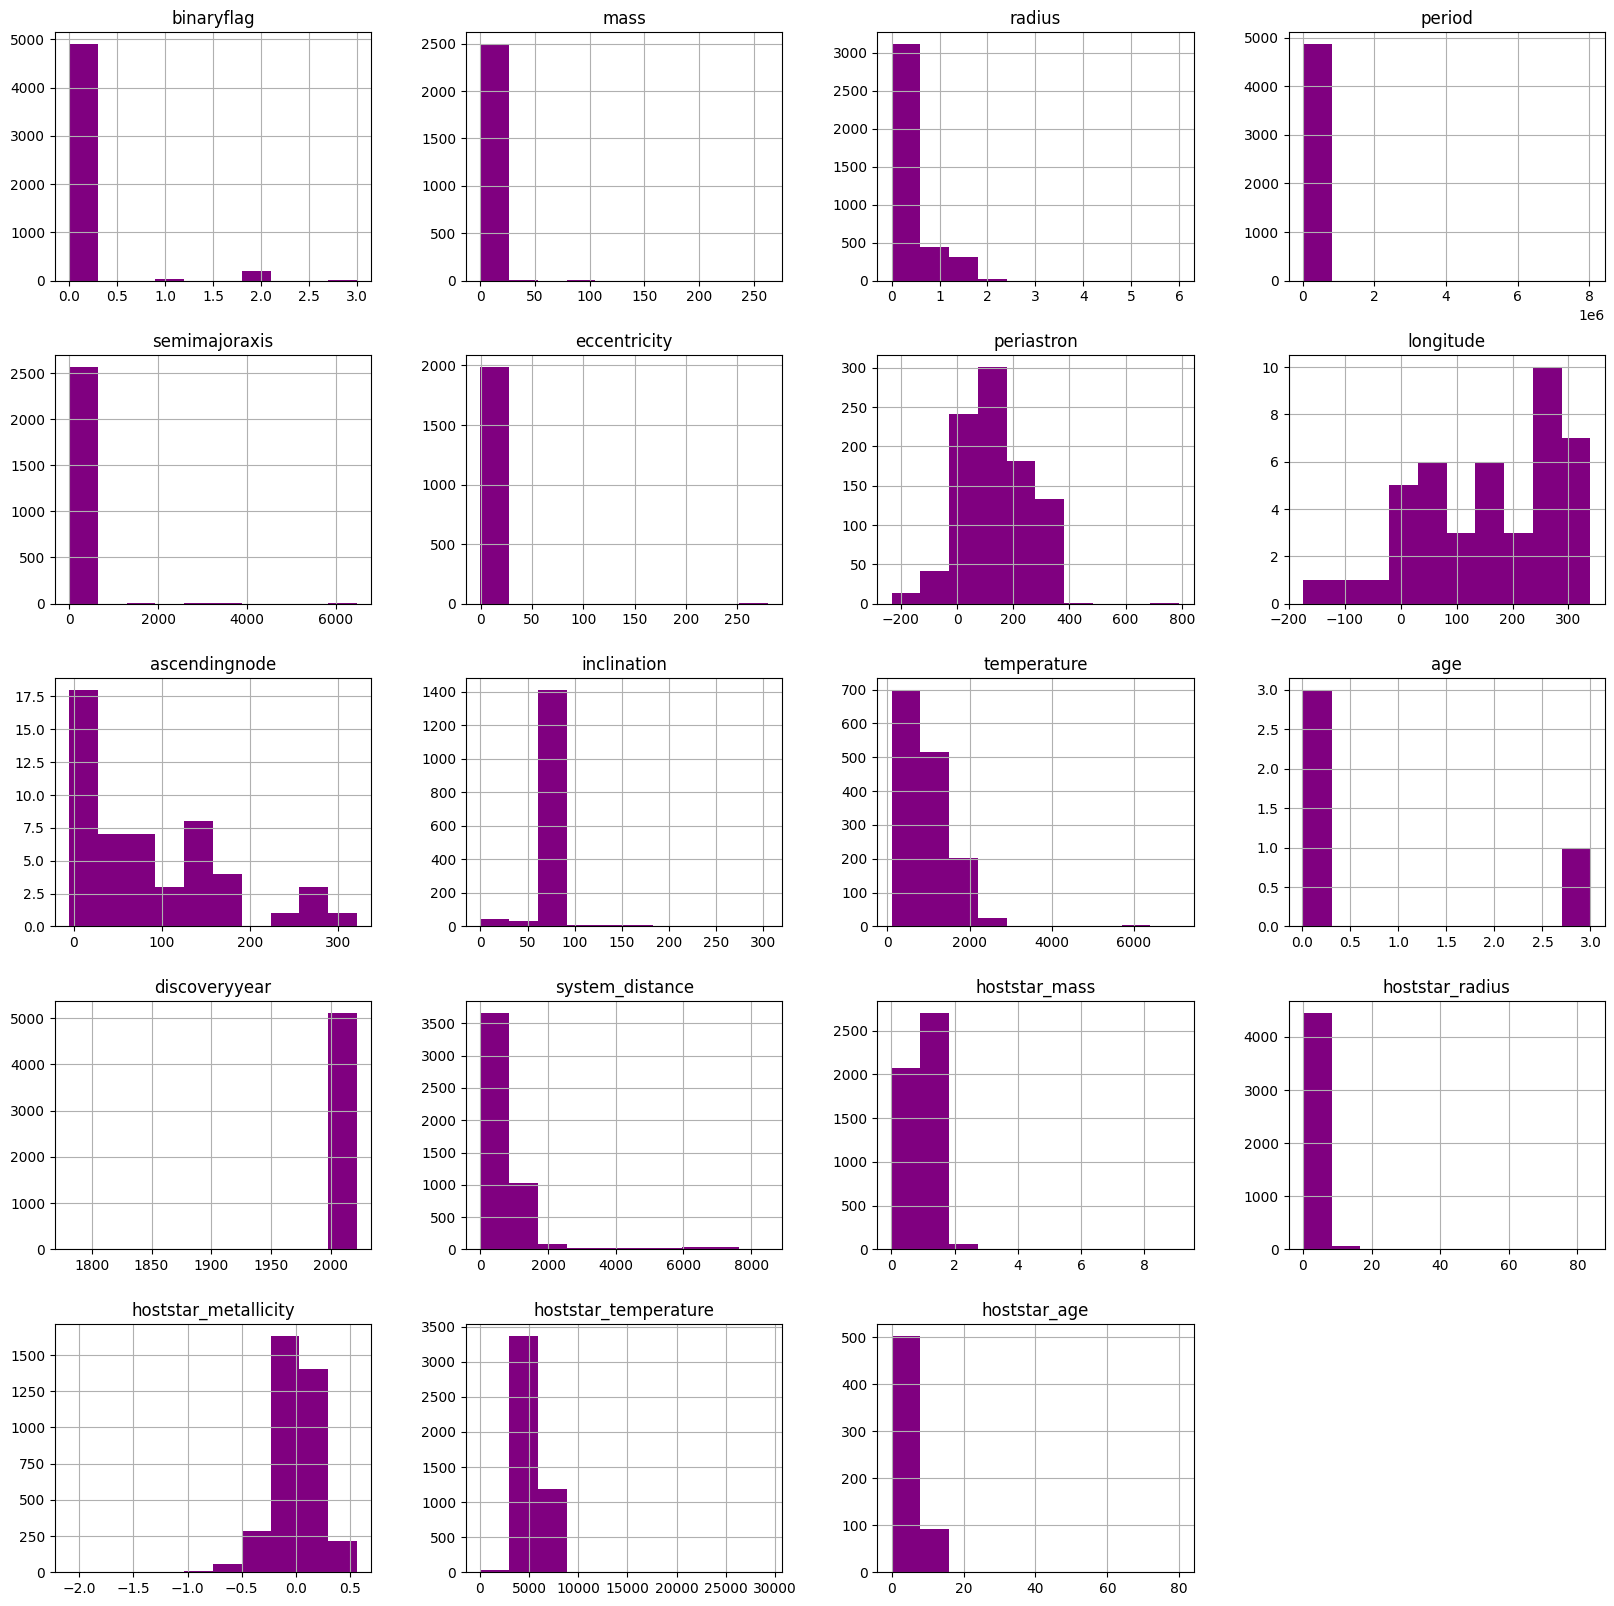

In [11]:
df_exoplanetas.hist(figsize=(20,20), color = "purple")
plt.show()

> Podemos observar lo siguiente de las gráficas obtenidas:
- De la mayoría de los planetas no se conoce compañera binaria estelar, es decir no tienen otra estrella que orbita alrededor de una masa común.
- Casi todos los planetas, su masas se encuentran cerca de la de Júpiter, al igual que el radio.
- El período o tiempo que tardan en realizar una vuelta completa a su estrella anfitriona, no alcanza el 2, pero hay que tener en cuenta que eje x se encuentra en base a 1e6, lo que corresponde al valor de 403 días.
- La temperatura de los diferentes planetas oscila desde un mínimo de 102.2 K (-170,95 C) a un máximo de 7112 K (6838,85 C).
- Los años en los que se descubrieron la mayoría de los planetas es a partir de los 2000s, esto puede deberse a la mejoría de las tecnologías e implementación de nuevos métodos.
- La tabla de la última actualización parece contener datos de hasta el 2032, por lo que puede que se llegen a descartar a la hora de filtrar los datos.
- Las estadísticas para la estrella anfitriona de cada planeta no se desvía demasiado de las características que guarda nuestra estrella el Sol.
<br><br>
- Se puede observar que en varias gráficas como la masa, radio, temperatura del planeta entre otros, tienen valores 0 o vacíos en sus datos. Es cierto que hay algunas columnas cuyos datos pueden llegar a ser 0 como, binaryflag y eccentricity.

In [15]:
# Se muestran el numero de datos nulos que se encuentran en los datos
df_exoplanetas.isnull().sum()

name                        1
binaryflag                  0
mass                     2633
radius                   1248
period                    270
semimajoraxis            2569
eccentricity             3152
periastron               4227
longitude                5097
ascendingnode            5088
inclination              3625
temperature              3691
age                      5136
discoverymethod            10
discoveryyear               9
lastupdate                  5
system_rightascension       9
system_declination          9
system_distance           224
hoststar_mass             292
hoststar_radius           594
hoststar_metallicity     1531
hoststar_temperature      544
hoststar_age             4545
list                        0
dtype: int64

Se puede contemplar que en la mayoría de las columnas hay datos nulos o vacíos. Por lo tanto, éstos serán reemplazados por la media de sus datos totales. Sin embargo, datos como name, discoverymethod, discorveryyear, lastupdate etc. se mantendrán como están, ya que no se puede elaborar la media de una fecha, de un texto o incluso de cifras que no tendría mucho sentido hacer la media.

También una idea para resolver este problema, sería realizar un clustering de todos los planetas que contengan todos los datos y observar cómo quedarían.

In [16]:
df_exoplanetas_datosModificados = df_exoplanetas.copy()
columnas_datosNulos = [ "mass", "radius", "period", "semimajoraxis", "periastron", "longitude", "ascendingnode", "inclination", "temperature", "age", "system_distance", "hoststar_mass", "hoststar_metallicity", "hoststar_temperature", "hoststar_age"]

for col in columnas_datosNulos:
    df_exoplanetas_datosModificados[ col ] = df_exoplanetas_datosModificados[ col ].replace( to_replace=np.nan, value=np.mean(df_exoplanetas_datosModificados [col] ))
    
print(df_exoplanetas_datosModificados)

               name  binaryflag     mass    radius       period  \
0       KOI-1843.03           0  0.00140  0.054000     0.176891   
1      Kepler-974 b           0  2.31145  0.140000     4.194497   
2       KOI-1843.02           0  2.31145  0.071000     6.356006   
3        Kepler-9 b           0  0.25000  0.840000    19.224180   
4        Kepler-9 c           0  0.17000  0.820000    39.031060   
...             ...         ...      ...       ...          ...   
5135      eta Cet b           0  2.46000  0.401121   407.300000   
5136      eta Cet c           0  3.16000  0.401121   744.300000   
5137    HD 108874 b           0  1.36000  0.401121   395.400000   
5138    HD 108874 c           0  1.01800  0.401121  1605.800000   
5139  Kepler-1473 b           0  2.31145  0.106000    14.427355   

      semimajoraxis  eccentricity  periastron   longitude  ascendingnode  ...  \
0          0.004800           NaN  134.905159  154.805248      84.378767  ...   
1          0.039000           NaN

In [17]:
df_exoplanetas_datosModificados.isnull().sum()

name                        1
binaryflag                  0
mass                        0
radius                      0
period                      0
semimajoraxis               0
eccentricity             3152
periastron                  0
longitude                   0
ascendingnode               0
inclination                 0
temperature                 0
age                         0
discoverymethod            10
discoveryyear               9
lastupdate                  5
system_rightascension       9
system_declination          9
system_distance             0
hoststar_mass               0
hoststar_radius           594
hoststar_metallicity        0
hoststar_temperature        0
hoststar_age                0
list                        0
dtype: int64

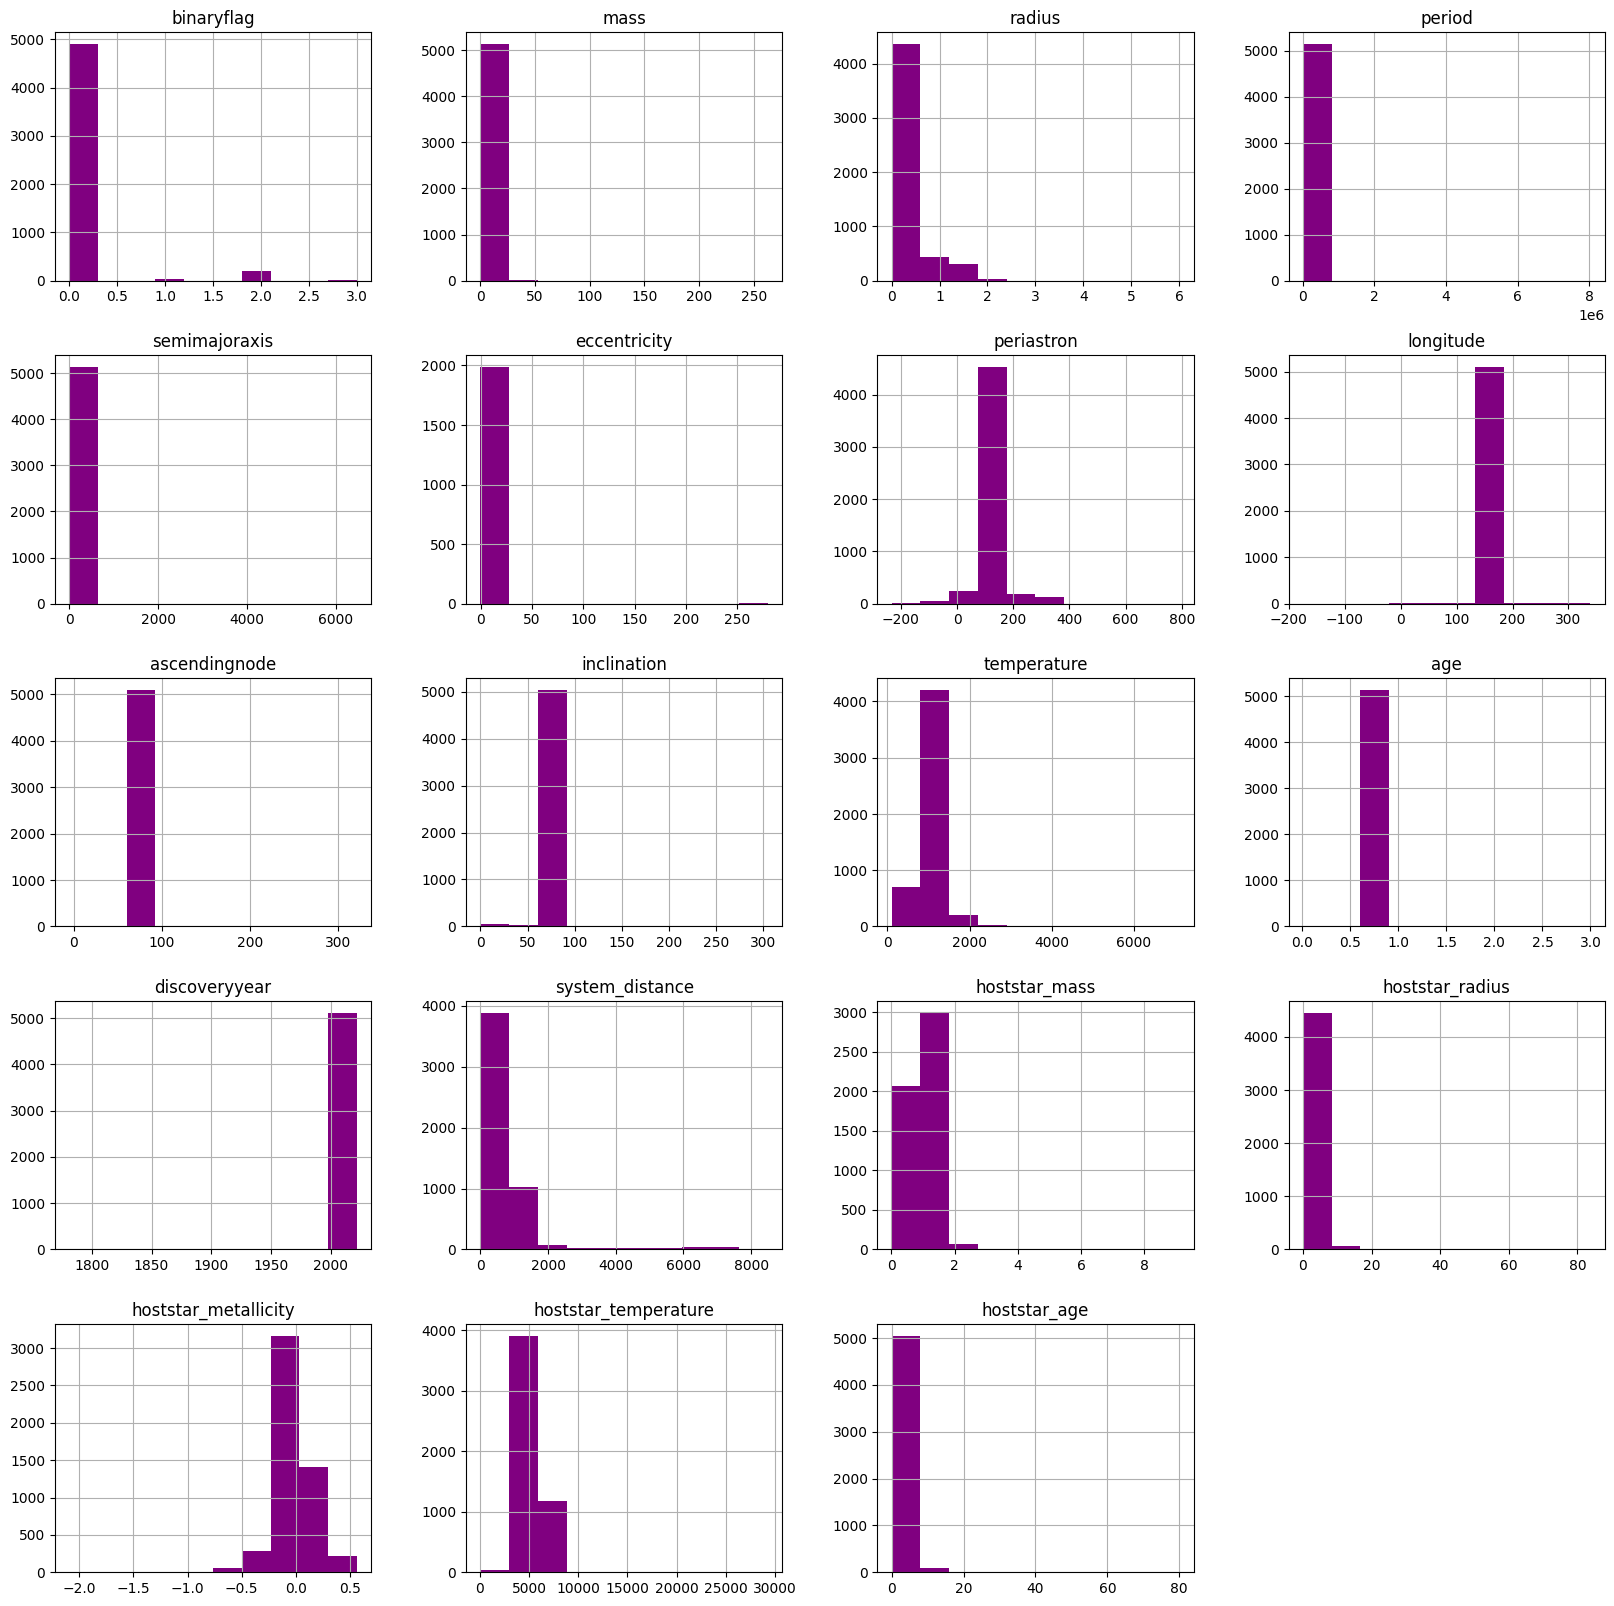

In [18]:
df_exoplanetas_datosModificados.hist(figsize=(20,20), color = "purple")
plt.show()

Una vez analizadas la distinta información de cada dato, se van a estudiar las relaciones que guardan éstas variables entre sí, para así mostrar las gráficas correspondientes y proceder a realizar las predicciones mencionadas al principio de este documento.

### <u>Correlación entre los datos</u>

Para conocer que tipo de relación guardan el tipo de datos entre sí, se sacará un mapa de calor en que se puede observar cuánto de correspondencia mantienen.

In [161]:
corr_ = df_exoplanetas.corr()
plt.figure(figsize=(20, 20))

sns.heatmap(corr_, annot=True, cmap='PRGn')

plt.show()

> A través de este diagrama se pueden apreciar algunas correlaciones:
- La masa, el radio y la temperatura de las estrellas están altamente correlacionados.
- Las masas y los radios de los planetas, así como los radios y la temperatura de la superficie, también están correlacionados, pero las masas y la temperatura no lo están.
- Existe una correlación casi perfecta entre la distancia entre el planeta y la estrella anfitriona (semimajoraxis) con la duración del período orbital (period). 
- El radio y la masa de un planeta no tienen relación con el período. Entonces, resulta que la velocidad de un planeta no se ve afectada por su tamaño.
- hoststar_metallicity no tiene altas correlaciones con otras variables.
- La excentricidad tiene relaciones bajas con period , semimajoraxis y hoststar_temperature.

### <u>Número de descubrimientos por año</u>

In [163]:
# Se crea un dataframe con las columnas que nos interesan
exoplanetas_descubiertos = df_exoplanetas[['name' , 'discoveryyear','discoverymethod']]

In [164]:
# Eliminar planetas no descubiertos (eliminar filas)
exoplanetas_descubiertos = exoplanetas_descubiertos[exoplanetas_descubiertos['discoverymethod'].notna()]

In [165]:
# Gráfica planetas descubiertos por año
planeta_por_anio= exoplanetas_descubiertos['discoveryyear'].groupby([exoplanetas_descubiertos['discoveryyear']]).count()
y = planeta_por_anio
x = planeta_por_anio.index
figure(figsize=(20, 20))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.grid()
plt.xlabel("Año")
plt.ylabel("Número de exoplanetas")
plt.title("Exoplanetas descubiertos por año")
xlabels = planeta_por_anio.index
plt.plot(x, y, color="purple")

De esta gráfica podemos observar que el peor año de descubrimientos fue en el 2015, a comparación de su año anterior, el cúal registró un buen número de exoplanetas. Por otro lado el 2016, resultó ser el mejor, con el mayor número descubrimientos.

In [166]:
exoplanetas_descubiertos[exoplanetas_descubiertos["discoveryyear"]==2014]

name  discoveryyear discoverymethod
6       GJ 160.2 b         2014.0              RV
17    Kepler-153 b         2014.0         transit
18    Kepler-153 c         2014.0         transit
22       HD 4203 c         2014.0              RV
42    Kepler-131 b         2014.0         transit
...            ...            ...             ...
5102  Kepler-312 b         2014.0         transit
5103  Kepler-337 c         2014.0         transit
5104  Kepler-337 b         2014.0         transit
5135     eta Cet b         2014.0              RV
5136     eta Cet c         2014.0              RV

[933 rows x 3 columns]

In [167]:
exoplanetas_descubiertos[exoplanetas_descubiertos["discoveryyear"]==2015]

name  discoveryyear discoverymethod
38        Kepler-431 b         2015.0         transit
39        Kepler-431 c         2015.0         transit
40        Kepler-431 d         2015.0         transit
55         HD 164595 b         2015.0              RV
178   EPIC 206011691 b         2015.0         transit
...                ...            ...             ...
4929        V830 Tau b         2015.0              RV
4949          51 Eri b         2015.0         imaging
4980         KELT-4A b         2015.0         transit
5124        WASP-122 b         2015.0         transit
5127          FL Lyr b         2015.0          timing

[197 rows x 3 columns]

In [168]:
exoplanetas_descubiertos[exoplanetas_descubiertos["discoveryyear"]==2016]

name  discoveryyear discoverymethod
1      Kepler-974 b         2016.0         transit
2       KOI-1843.02         2016.0         transit
7      Kepler-566 b         2016.0         transit
8        WASP-124 b         2016.0         transit
11    Kepler-1343 b         2016.0         transit
...             ...            ...             ...
5115   Kepler-582 b         2016.0         transit
5123    HD 222076 b         2016.0              RV
5130  Kepler-1359 b         2016.0         transit
5134   Kepler-658 b         2016.0         transit
5139  Kepler-1473 b         2016.0         transit

[1499 rows x 3 columns]

El 2014 registró 933, el 2015 una baja cifra con 197 y el 2016 un total de 1499 exoplanetas.

### <u>Métodos de descubrimiento</u>

In [170]:
metodo_descubrimiento = exoplanetas_descubiertos.groupby(['discoveryyear', 'discoverymethod'])[['discoverymethod']].agg(['count'])

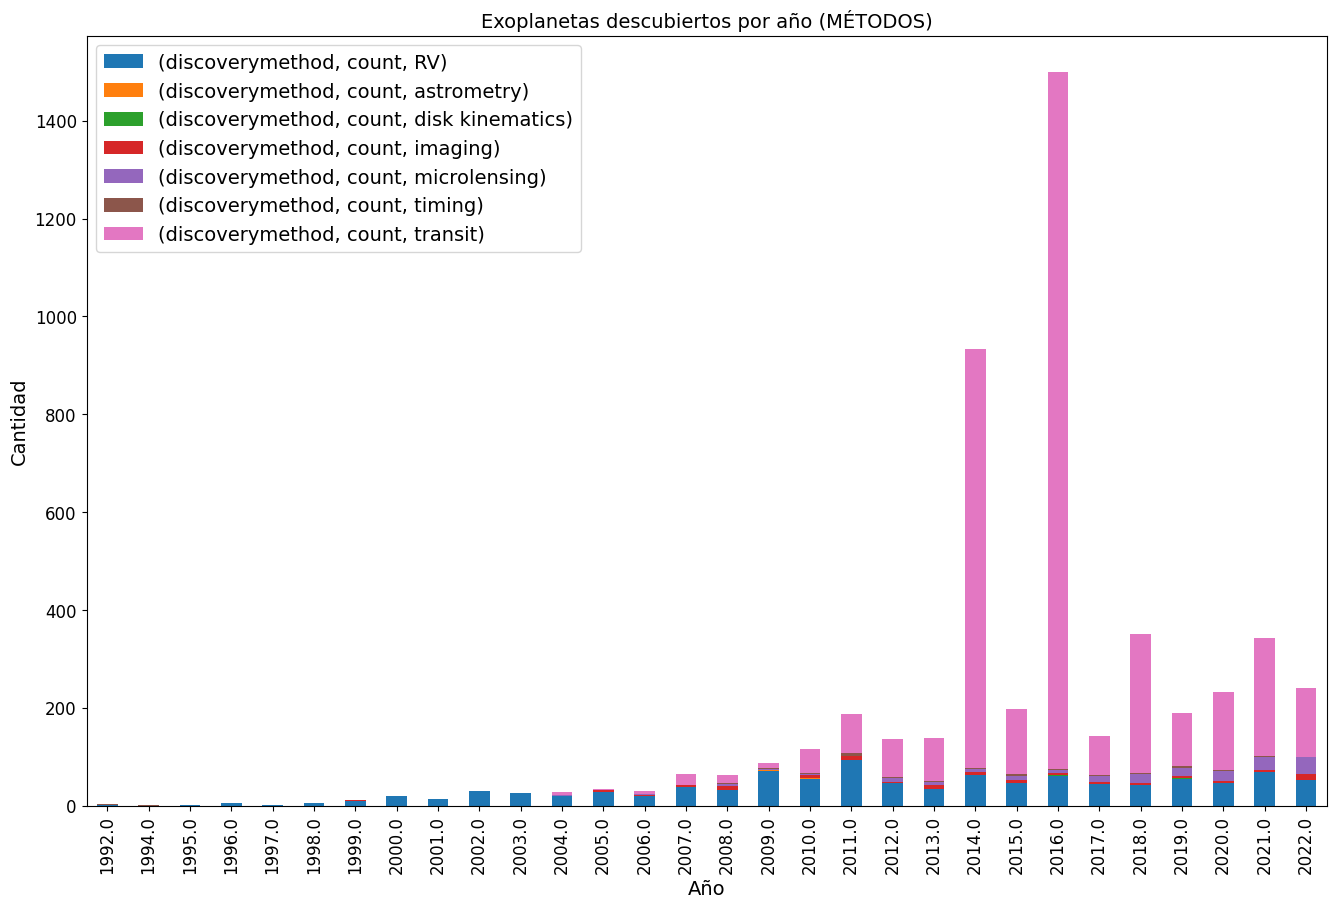

In [172]:
metodo_descubrimiento.unstack().plot(kind='bar',
                                     stacked='False',
                                     figsize=(16, 10),
                                    fontsize=12,
                                    label='test')
plt.xlabel('Año',fontsize=14)
plt.ylabel('Cantidad',fontsize=14)
plt.title('Exoplanetas descubiertos por año (MÉTODOS)',fontsize=14)
plt.legend(loc='upper left', prop={'size': 14})

De la siguiente gráfica nos fijamos de que el método que más se ha utilizado y con el que se han descubierto un mayor número de exoplanetas es "<i>transit</i>". Este método se produce cuando el planeta se mueve entre nosotros y la estrella que está orbitando, entonces, el planeta bloquea algo de la luz de la estrella y disminuye la cantidad de luz de la misma.
<br>
Mientras que el menos resulta ser el método "<i>disk kinematics</i>". Es la medición de la cinemática o los movimientos de las estrellas a través del espacio

<AxesSubplot:>

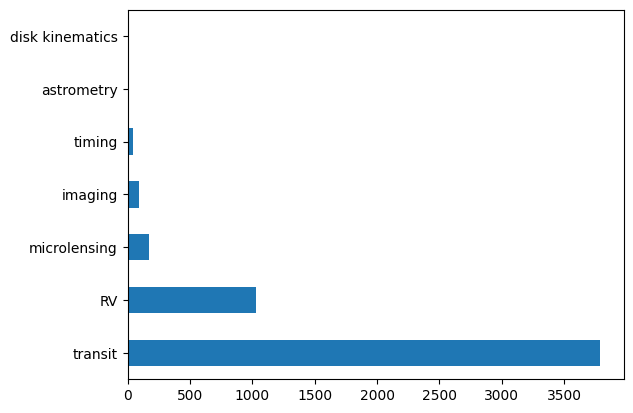

In [253]:
df_exoplanetas['discoverymethod'].value_counts()[:20].plot(kind='barh')

En esta gráfica se puede observar de mejor manera.

### <u>Predicciones</u>

<b>Clasificación de los planetas por densidad con el k-nn<b>

In [3]:
df_exoplanetas_knn = pd.read_csv("exoplanetas.txt", sep=",")

In [20]:
category_labels = {0: 'Terrestrial planet', 1: 'Asteroid/comet', 2: 'Icy moon', 3: 'Giant planet'}
num_category_labels = len(category_labels)

In [4]:
df_exoplanetas_knn = df_exoplanetas_knn.set_index('name', drop=True)

In [5]:
df_exoplanetas_knn = df_exoplanetas_knn.loc[(df_exoplanetas_knn['mass'].notnull()) & (df_exoplanetas_knn['radius'].notnull())].reindex()

In [6]:
df_exoplanetas_knn['RadiusSI'] = [(x*ua.jupiterRad).to(u.m).value for x in df_exoplanetas_knn['radius']]
df_exoplanetas_knn['RadiusKm'] = df_exoplanetas_knn['RadiusSI'] * 1E-3
df_exoplanetas_knn['MassSI'] = [(x*ua.jupiterMass).to(u.kg).value for x in df_exoplanetas_knn['mass']]
df_exoplanetas_knn['VolumeSI'] = 4/3 * np.pi * df_exoplanetas_knn['RadiusSI'] ** 3

# Calculate the density of each body
df_exoplanetas_knn['DensitySI'] = df_exoplanetas_knn['MassSI'] / df_exoplanetas_knn['VolumeSI']

In [7]:
earth_density = float(df_exoplanetas_knn.loc['Earth', 'DensitySI'])
saturn_density = df_exoplanetas_knn.loc['Saturn', 'DensitySI']

In [8]:
float(earth_density)

5154.574875881941

In [9]:
newdf = df_exoplanetas_knn[["RadiusSI", "MassSI", "DensitySI"]].dropna()
cols = newdf[newdf.columns[newdf.columns != "DensitySI"]]

In [10]:
newdf.describe()

RadiusSI        MassSI     DensitySI
count  1.284000e+03  1.284000e+03  1.284000e+03
mean   5.332223e+07  2.489512e+27  5.178423e+03
std    4.017978e+07  6.833931e+27  5.567848e+04
min    1.175178e+06  1.472591e+22  3.017781e+01
25%    1.501332e+07  4.110389e+25  6.425799e+02
50%    5.425528e+07  3.758287e+26  1.735575e+03
75%    8.552230e+07  2.002047e+27  3.915934e+03
max    4.289520e+08  1.499518e+29  1.760680e+06

In [11]:
filtro = newdf["DensitySI"] > float(earth_density)

In [12]:
# Ponemos etiquetas a nuestros casos.
newdf["DensitySI"][filtro] = "Planeta Grande"
newdf["DensitySI"][filtro == False] = "Planeta Ligero"

C:\Users\lemba\anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
newdf["DensitySI"]

name
KOI-1843.03     Planeta Grande
Kepler-9 b      Planeta Ligero
Kepler-9 c      Planeta Ligero
Kepler-9 d      Planeta Grande
WASP-124 b      Planeta Ligero
                     ...      
TOI-2257 b      Planeta Ligero
WASP-160 B b    Planeta Ligero
HAT-P-21 b      Planeta Ligero
HAT-P-67 b      Planeta Ligero
HAT-P-34 b      Planeta Ligero
Name: DensitySI, Length: 1284, dtype: object

In [14]:
nbrs_3 = KNeighborsClassifier(n_neighbors = 2, n_jobs = -1)

In [15]:
nbrs_3.fit(cols, newdf["DensitySI"])

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [16]:
predicciones_3 = nbrs_3.predict(cols)

In [17]:
np.mean(predicciones_3 == newdf["DensitySI"])

0.9190031152647975

In [18]:
np.mean(newdf["DensitySI"] == "Planeta Ligero")

0.8403426791277259

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(newdf["DensitySI"], predicciones_3)
print(confusion_matrix)

[[205   0]
 [104 975]]


In [20]:
f,ax=plt.subplots()

sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="BuPu") #Dibuja un mapa de calor

ax.set_title('Matriz de Confusión') #título
ax.set_xlabel('predicción') #eje x
ax.set_ylabel('Realidad') #eje y

Text(50.722222222222214, 0.5, 'Realidad')

In [21]:
newdf["DensitySI"]

name
KOI-1843.03     Planeta Grande
Kepler-9 b      Planeta Ligero
Kepler-9 c      Planeta Ligero
Kepler-9 d      Planeta Grande
WASP-124 b      Planeta Ligero
                     ...      
TOI-2257 b      Planeta Ligero
WASP-160 B b    Planeta Ligero
HAT-P-21 b      Planeta Ligero
HAT-P-67 b      Planeta Ligero
HAT-P-34 b      Planeta Ligero
Name: DensitySI, Length: 1284, dtype: object

In [39]:
planetasLigeros = 0
planetasGrandes = 0
for i in newdf["DensitySI"]:
    if i == "Planeta Ligero":
        planetasLigeros = planetasLigeros + 1
    else:
        planetasGrandes = planetasGrandes + 1 
        
        
print("El número de planetas ligeros es: " + str(planetasLigeros))
print("El número de planetas grandes es: " + str(planetasGrandes))


El número de planetas ligeros es: 1079
El número de planetas grandes es: 205


<b>Regresión logística</b> Prediccion de la distancia del planeta a su estrella por el periodo de orbita

In [531]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [532]:
df_exoplanetas_rlog = pd.read_csv("exoplanetas.txt", sep=",")

In [533]:
df_exoplanetas_rlog.columns

Index(['name', 'binaryflag', 'mass', 'radius', 'period', 'semimajoraxis',
       'eccentricity', 'periastron', 'longitude', 'ascendingnode',
       'inclination', 'temperature', 'age', 'discoverymethod', 'discoveryyear',
       'lastupdate', 'system_rightascension', 'system_declination',
       'system_distance', 'hoststar_mass', 'hoststar_radius',
       'hoststar_metallicity', 'hoststar_temperature', 'hoststar_age', 'list'],
      dtype='object')

In [534]:
df_exoplanetas_rlog =df_exoplanetas_rlog.dropna(subset=['semimajoraxis', 'period']) # quitar elementos nulos

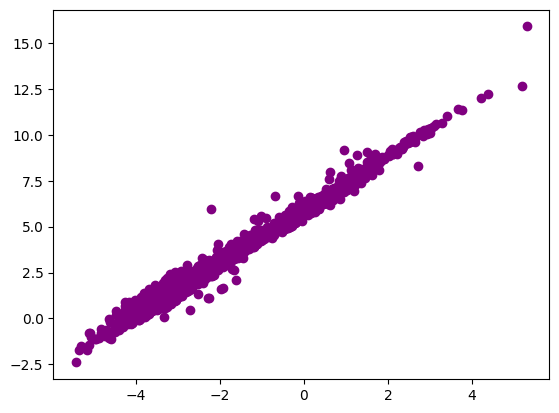

In [535]:
df_exoplanetas_rlog["semimajoraxislog"]=df_exoplanetas_rlog["semimajoraxis"].apply(np.log)
df_exoplanetas_rlog["periodlog"]=df_exoplanetas_rlog["period"].apply(np.log)
plt.scatter(df_exoplanetas_rlog["semimajoraxislog"],df_exoplanetas_rlog["periodlog"], color="purple")

In [536]:
linearRegressor = linear_model.LinearRegression()

In [537]:
xTrain=df_exoplanetas_rlog[["semimajoraxislog"]]
yTrain=df_exoplanetas_rlog["periodlog"]

In [538]:
yTrain.shape

(2417,)

In [539]:
xTrain.describe()

semimajoraxislog
count       2417.000000
mean          -1.691005
std            1.717321
min           -5.421616
25%           -2.999740
50%           -2.262403
75%           -0.283690
max            5.298317

In [540]:
yTrain.describe()

count    2417.000000
mean        3.417972
std         2.519662
min        -2.400129
25%         1.422638
50%         2.619825
75%         5.427370
max        15.899940
Name: periodlog, dtype: float64

In [541]:
linearRegressor.fit(xTrain,yTrain)

LinearRegression()

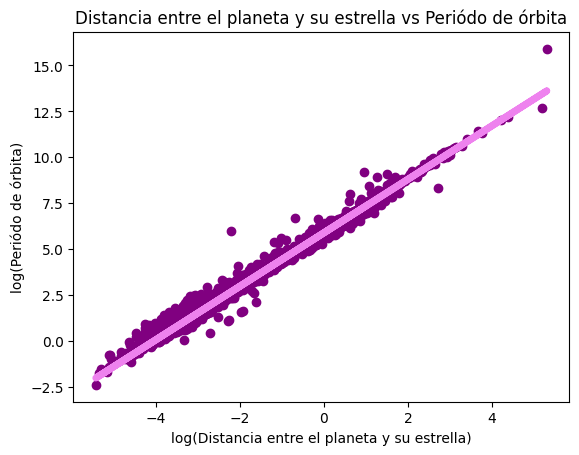

In [542]:
plt.scatter(xTrain, yTrain, color = 'purple')
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'violet',linewidth=5.0)
plt.title('Distancia entre el planeta y su estrella vs Periódo de órbita')
plt.xlabel('log(Distancia entre el planeta y su estrella)')
plt.ylabel('log(Periódo de órbita)')
plt.show()

In [543]:
linearRegressor.score(xTrain,yTrain)

0.9882111633961803

In [544]:
linearRegressor.coef_

array([1.45853076])

In [545]:
Y_pred = linearRegressor.predict(xTrain)

In [546]:
print("R cuadrado: ", r2_score(yTrain, Y_pred))

R cuadrado:  0.9882111633961803


<b>Random Forest</b> Predicción de la temperatura de la estrella anfitriona según su distancia al sol

In [602]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [630]:
df_exoplanetas_randomforest = pd.read_csv("exoplanetas.txt", sep=",")

In [631]:
df_exoplanetas_datosModificados = df_exoplanetas_randomforest.copy()
columnas_datosNulos = [ "mass", "radius", "period", "semimajoraxis", "periastron", "longitude", "ascendingnode", "inclination", "temperature", "age", "system_distance", "hoststar_mass", "hoststar_metallicity", "hoststar_temperature", "hoststar_radius", "hoststar_age"]

for col in columnas_datosNulos:
    df_exoplanetas_datosModificados[ col ] = df_exoplanetas_datosModificados[ col ].replace( to_replace=np.nan, value=np.mean(df_exoplanetas_datosModificados [col] ))
    
print(df_exoplanetas_datosModificados)

               name  binaryflag     mass    radius       period  \
0       KOI-1843.03           0  0.00140  0.054000     0.176891   
1      Kepler-974 b           0  2.31145  0.140000     4.194497   
2       KOI-1843.02           0  2.31145  0.071000     6.356006   
3        Kepler-9 b           0  0.25000  0.840000    19.224180   
4        Kepler-9 c           0  0.17000  0.820000    39.031060   
...             ...         ...      ...       ...          ...   
5135      eta Cet b           0  2.46000  0.401121   407.300000   
5136      eta Cet c           0  3.16000  0.401121   744.300000   
5137    HD 108874 b           0  1.36000  0.401121   395.400000   
5138    HD 108874 c           0  1.01800  0.401121  1605.800000   
5139  Kepler-1473 b           0  2.31145  0.106000    14.427355   

      semimajoraxis  eccentricity  periastron   longitude  ascendingnode  ...  \
0          0.004800           NaN  134.905159  154.805248      84.378767  ...   
1          0.039000           NaN

In [632]:
df_exoplanetas_datosModificados

name  binaryflag     mass    radius       period  \
0       KOI-1843.03           0  0.00140  0.054000     0.176891   
1      Kepler-974 b           0  2.31145  0.140000     4.194497   
2       KOI-1843.02           0  2.31145  0.071000     6.356006   
3        Kepler-9 b           0  0.25000  0.840000    19.224180   
4        Kepler-9 c           0  0.17000  0.820000    39.031060   
...             ...         ...      ...       ...          ...   
5135      eta Cet b           0  2.46000  0.401121   407.300000   
5136      eta Cet c           0  3.16000  0.401121   744.300000   
5137    HD 108874 b           0  1.36000  0.401121   395.400000   
5138    HD 108874 c           0  1.01800  0.401121  1605.800000   
5139  Kepler-1473 b           0  2.31145  0.106000    14.427355   

      semimajoraxis  eccentricity  periastron   longitude  ascendingnode  ...  \
0          0.004800           NaN  134.905159  154.805248      84.378767  ...   
1          0.039000           NaN  134.905159  154.805248      84.378767  ...   
2          0.052000           NaN  134.905159  154.805248      84.378767  ...   
3          0.143000        0.0626  134.905159  154.805248      84.378767  ...   
4          0.229000        0.0684  134.905159  154.805248      84.378767  ...   
...             ...           ...         ...         ...            ...  ...   
5135       1.270000        0.1700  247.200000  154.805248      84.378767  ...   
5136       1.930000        0.0200   36.670000  154.805248      84.378767  ...   
5137       1.051000        0.0700  134.905159  154.805248      84.378767  ...   
5138       2.680000        0.2500  134.905159  154.805248      84.378767  ...   
5139       7.961922           NaN  134.905159  154.805248      84.378767  ...   

      lastupdate  system_rightascension  system_declination system_distance  \
0       13/07/15          19 00 03.1450      +40 13 14.7985         134.833   
1       17/11/28          19 00 03.1450      +40 13 14.7985         134.833   
2            NaN          19 00 03.1450      +40 13 14.7985         134.833   
3       15/12/03          19 02 17.7544      +38 24 03.1772         650.000   
4       15/12/03          19 02 17.7544      +38 24 03.1772         650.000   
...          ...                    ...                 ...             ...   
5135    15/12/11         01 08 35.39148      -10 10 56.1570          37.990   
5136    15/12/11         01 08 35.39148      -10 10 56.1570          37.990   
5137    10/12/29          12 30 26.8817      +22 52 47.3806          68.500   
5138    10/12/29          12 30 26.8817      +22 52 47.3806          68.500   
5139    16/05/10          19 22 32.7843      +48 59 46.2496         664.761   

      hoststar_mass hoststar_radius hoststar_metallicity hoststar_temperature  \
0              0.52            0.50                 0.07               3687.0   
1              0.52            0.50                 0.07               3687.0   
2              0.52            0.50                 0.07               3687.0   
3              1.07            1.02                 0.12               5777.0   
4              1.07            1.02                 0.12               5777.0   
...             ...             ...                  ...                  ...   
5135           1.70           14.30                 0.12               4528.0   
5136           1.70           14.30                 0.12               4528.0   
5137           1.00            1.22                 0.14               5407.0   
5138           1.00            1.22                 0.14               5407.0   
5139           1.09            1.09                -0.01               6046.0   

      hoststar_age               list  
0         4.692809      Controversial  
1         4.692809  Confirmed planets  
2         4.692809      Controversial  
3         4.692809  Confirmed planets  
4         4.692809  Confirmed planets  
...            ...                ...  
5135      4.692809  Confirmed plane

In [606]:
df_exoplanetas_datosModificados.isnull().sum()

name                        1
binaryflag                  0
mass                        0
radius                      0
period                      0
semimajoraxis               0
eccentricity             3152
periastron                  0
longitude                   0
ascendingnode               0
inclination                 0
temperature                 0
age                         0
discoverymethod            10
discoveryyear               9
lastupdate                  5
system_rightascension       9
system_declination          9
system_distance             0
hoststar_mass               0
hoststar_radius             0
hoststar_metallicity        0
hoststar_temperature        0
hoststar_age                0
list                        0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_HR.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_HR[col] = df_HR[col].astype(float)
    df_HR[[col]] = scaler.fit_transform(df_HR[[col]])
df_HR['Attrition'] = pd.to_numeric(df_HR['Attrition'], downcast='float')
df_HR.head()

In [633]:
df_exoplanetas_datosModificados = df_exoplanetas_datosModificados.dropna(subset = ["hoststar_temperature"])
df_exoplanetas_datosModificados = df_exoplanetas_datosModificados.sample(frac = 1)
# Se reserva el 25% para el test
df_exoplanetas_randomforest_test = df_exoplanetas_datosModificados.tail(1285)
df_exoplanetas_datosModificados = df_exoplanetas_datosModificados

In [617]:
df_exoplanetas_datosModificados.columns

Index(['name', 'binaryflag', 'mass', 'radius', 'period', 'semimajoraxis',
       'eccentricity', 'periastron', 'longitude', 'ascendingnode',
       'inclination', 'temperature', 'age', 'discoverymethod', 'discoveryyear',
       'lastupdate', 'system_rightascension', 'system_declination',
       'system_distance', 'hoststar_mass', 'hoststar_radius',
       'hoststar_metallicity', 'hoststar_temperature', 'hoststar_age', 'list'],
      dtype='object')

In [618]:
df_exoplanetas_datosModificados["hoststar_temperature"].describe()

count     5140.000000
mean      5406.856440
std       1134.607011
min         58.370000
25%       5055.000000
50%       5470.000000
75%       5885.000000
max      29300.000000
Name: hoststar_temperature, dtype: float64

In [634]:
X = df_exoplanetas_datosModificados[["system_distance", "hoststar_mass", "hoststar_radius", "hoststar_metallicity", "hoststar_age"]]
X_test = df_exoplanetas_randomforest_test[["system_distance", "hoststar_mass", "hoststar_radius", "hoststar_metallicity", "hoststar_age"]]
Y = df_exoplanetas_datosModificados["hoststar_temperature"] > 5406

In [635]:
Y_test = df_exoplanetas_randomforest_test["hoststar_temperature"] > 5406

In [624]:
clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

# Clasificamos las variables con mayor importancia, el retraso de salida DepDelay es el más aproximado.
clf.feature_importances_

array([0.13858943, 0.2912259 , 0.4797151 , 0.07487249, 0.01559707])

In [625]:
clf.score(X, Y)

0.9998054474708171

In [626]:
np.mean(Y_test == Y_pred_test)

0.9992217898832685

<b>Gradient boosted trees</b> Predicción de la temperatura de la estrella anfitriona según su distancia al sol 


In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
df_exoplanetas_gradient = pd.read_csv("exoplanetas.txt", sep=",")

In [5]:
df_exoplanetas_datosModificados = df_exoplanetas_gradient.copy()
columnas_datosNulos = [ "mass", "radius", "period", "semimajoraxis", "periastron", "longitude", "ascendingnode", "inclination", "temperature", "age", "system_distance", "hoststar_mass", "hoststar_metallicity", "hoststar_temperature", "hoststar_radius", "hoststar_age"]

In [6]:
for col in columnas_datosNulos:
    df_exoplanetas_datosModificados[ col ] = df_exoplanetas_datosModificados[ col ].replace( to_replace=np.nan, value=np.mean(df_exoplanetas_datosModificados [col] ))
print(df_exoplanetas_datosModificados)

               name  binaryflag     mass    radius       period  \
0       KOI-1843.03           0  0.00140  0.054000     0.176891   
1      Kepler-974 b           0  2.31145  0.140000     4.194497   
2       KOI-1843.02           0  2.31145  0.071000     6.356006   
3        Kepler-9 b           0  0.25000  0.840000    19.224180   
4        Kepler-9 c           0  0.17000  0.820000    39.031060   
...             ...         ...      ...       ...          ...   
5135      eta Cet b           0  2.46000  0.401121   407.300000   
5136      eta Cet c           0  3.16000  0.401121   744.300000   
5137    HD 108874 b           0  1.36000  0.401121   395.400000   
5138    HD 108874 c           0  1.01800  0.401121  1605.800000   
5139  Kepler-1473 b           0  2.31145  0.106000    14.427355   

      semimajoraxis  eccentricity  periastron   longitude  ascendingnode  ...  \
0          0.004800           NaN  134.905159  154.805248      84.378767  ...   
1          0.039000           NaN

In [7]:
df_exoplanetas_datosModificados

name  binaryflag     mass    radius       period  \
0       KOI-1843.03           0  0.00140  0.054000     0.176891   
1      Kepler-974 b           0  2.31145  0.140000     4.194497   
2       KOI-1843.02           0  2.31145  0.071000     6.356006   
3        Kepler-9 b           0  0.25000  0.840000    19.224180   
4        Kepler-9 c           0  0.17000  0.820000    39.031060   
...             ...         ...      ...       ...          ...   
5135      eta Cet b           0  2.46000  0.401121   407.300000   
5136      eta Cet c           0  3.16000  0.401121   744.300000   
5137    HD 108874 b           0  1.36000  0.401121   395.400000   
5138    HD 108874 c           0  1.01800  0.401121  1605.800000   
5139  Kepler-1473 b           0  2.31145  0.106000    14.427355   

      semimajoraxis  eccentricity  periastron   longitude  ascendingnode  ...  \
0          0.004800           NaN  134.905159  154.805248      84.378767  ...   
1          0.039000           NaN  134.905159  154.805248      84.378767  ...   
2          0.052000           NaN  134.905159  154.805248      84.378767  ...   
3          0.143000        0.0626  134.905159  154.805248      84.378767  ...   
4          0.229000        0.0684  134.905159  154.805248      84.378767  ...   
...             ...           ...         ...         ...            ...  ...   
5135       1.270000        0.1700  247.200000  154.805248      84.378767  ...   
5136       1.930000        0.0200   36.670000  154.805248      84.378767  ...   
5137       1.051000        0.0700  134.905159  154.805248      84.378767  ...   
5138       2.680000        0.2500  134.905159  154.805248      84.378767  ...   
5139       7.961922           NaN  134.905159  154.805248      84.378767  ...   

      lastupdate  system_rightascension  system_declination system_distance  \
0       13/07/15          19 00 03.1450      +40 13 14.7985         134.833   
1       17/11/28          19 00 03.1450      +40 13 14.7985         134.833   
2            NaN          19 00 03.1450      +40 13 14.7985         134.833   
3       15/12/03          19 02 17.7544      +38 24 03.1772         650.000   
4       15/12/03          19 02 17.7544      +38 24 03.1772         650.000   
...          ...                    ...                 ...             ...   
5135    15/12/11         01 08 35.39148      -10 10 56.1570          37.990   
5136    15/12/11         01 08 35.39148      -10 10 56.1570          37.990   
5137    10/12/29          12 30 26.8817      +22 52 47.3806          68.500   
5138    10/12/29          12 30 26.8817      +22 52 47.3806          68.500   
5139    16/05/10          19 22 32.7843      +48 59 46.2496         664.761   

      hoststar_mass hoststar_radius hoststar_metallicity hoststar_temperature  \
0              0.52            0.50                 0.07               3687.0   
1              0.52            0.50                 0.07               3687.0   
2              0.52            0.50                 0.07               3687.0   
3              1.07            1.02                 0.12               5777.0   
4              1.07            1.02                 0.12               5777.0   
...             ...             ...                  ...                  ...   
5135           1.70           14.30                 0.12               4528.0   
5136           1.70           14.30                 0.12               4528.0   
5137           1.00            1.22                 0.14               5407.0   
5138           1.00            1.22                 0.14               5407.0   
5139           1.09            1.09                -0.01               6046.0   

      hoststar_age               list  
0         4.692809      Controversial  
1         4.692809  Confirmed planets  
2         4.692809      Controversial  
3         4.692809  Confirmed planets  
4         4.692809  Confirmed planets  
...            ...                ...  
5135      4.692809  Confirmed plane

In [8]:
df_exoplanetas_datosModificados.isnull().sum()

name                        1
binaryflag                  0
mass                        0
radius                      0
period                      0
semimajoraxis               0
eccentricity             3152
periastron                  0
longitude                   0
ascendingnode               0
inclination                 0
temperature                 0
age                         0
discoverymethod            10
discoveryyear               9
lastupdate                  5
system_rightascension       9
system_declination          9
system_distance             0
hoststar_mass               0
hoststar_radius             0
hoststar_metallicity        0
hoststar_temperature        0
hoststar_age                0
list                        0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_HR.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_HR[col] = df_HR[col].astype(float)
    df_HR[[col]] = scaler.fit_transform(df_HR[[col]])
df_HR['Attrition'] = pd.to_numeric(df_HR['Attrition'], downcast='float')
df_HR.head()

In [10]:
df_exoplanetas_datosModificados = df_exoplanetas_datosModificados.dropna(subset = ["hoststar_temperature"])
df_exoplanetas_datosModificados = df_exoplanetas_datosModificados.sample(frac = 1)
# Se reserva el 25% para el test
df_exoplanetas_randomforest_test = df_exoplanetas_datosModificados.tail(1285)
df_exoplanetas_datosModificados = df_exoplanetas_datosModificados

In [11]:
df_exoplanetas_datosModificados.columns

Index(['name', 'binaryflag', 'mass', 'radius', 'period', 'semimajoraxis',
       'eccentricity', 'periastron', 'longitude', 'ascendingnode',
       'inclination', 'temperature', 'age', 'discoverymethod', 'discoveryyear',
       'lastupdate', 'system_rightascension', 'system_declination',
       'system_distance', 'hoststar_mass', 'hoststar_radius',
       'hoststar_metallicity', 'hoststar_temperature', 'hoststar_age', 'list'],
      dtype='object')

In [12]:
df_exoplanetas_datosModificados["hoststar_temperature"].describe()

count     5140.000000
mean      5406.856440
std       1134.607011
min         58.370000
25%       5055.000000
50%       5470.000000
75%       5885.000000
max      29300.000000
Name: hoststar_temperature, dtype: float64

In [13]:
X = df_exoplanetas_datosModificados[["system_distance", "hoststar_mass", "hoststar_radius", "hoststar_metallicity", "hoststar_age"]]
X_test = df_exoplanetas_randomforest_test[["system_distance", "hoststar_mass", "hoststar_radius", "hoststar_metallicity", "hoststar_age"]]
Y = df_exoplanetas_datosModificados["hoststar_temperature"] > 5406

In [14]:
Y_test = df_exoplanetas_randomforest_test["hoststar_temperature"] > 5406

In [15]:
clf = GradientBoostingClassifier(n_estimators = 100,learning_rate=1.0,
...     max_depth=1, random_state=0)
clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

In [16]:
# Clasificamos las variables con mayor importancia, el retraso de salida DepDelay es el más aproximado.
clf.feature_importances_

array([0.02325603, 0.09067239, 0.85619478, 0.01993612, 0.00994068])

In [17]:
clf.score(X, Y)

0.9410505836575875

In [18]:
np.mean(Y_test == Y_pred_test)

0.9455252918287937